In [1]:
import scipy.io
import numpy as np

# Carregar dades des del fitxer .mat 
mat = scipy.io.loadmat(r"C:\Users\joana\Documents\Projectes personals\TR\matlab\matlab\emnist-letters.mat")

# Accedir a les dades
X_letters_train = mat['dataset']['train'][0,0]['images'][0,0]
y_letters_train = mat['dataset']['train'][0,0]['labels'][0,0]
X_letters_test = mat['dataset']['test'][0,0]['images'][0,0]
y_letters_test = mat['dataset']['test'][0,0]['labels'][0,0]

# Reformatar
X_letters_train = X_letters_train.reshape((-1, 28, 28), order='F').astype(np.uint8)
X_letters_test = X_letters_test.reshape((-1, 28, 28), order='F').astype(np.uint8)
y_letters_train = y_letters_train.flatten() - 1  # Canviar de 1-26 a 0-25
y_letters_test = y_letters_test.flatten() - 1

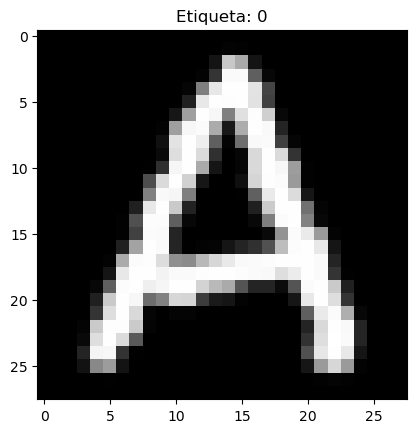

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_letters_train[32], cmap='gray')
plt.title(f"Etiqueta: {y_letters_train[32]}")
plt.show()

In [3]:
mat_digits = scipy.io.loadmat(r"C:\Users\joana\Documents\Projectes personals\TR\matlab\matlab\emnist-digits.mat")

# Dades d'entrenament
X_digits_train = mat_digits['dataset']['train'][0,0]['images'][0,0]
y_digits_train = mat_digits['dataset']['train'][0,0]['labels'][0,0]

# Dades de test
X_digits_test = mat_digits['dataset']['test'][0,0]['images'][0,0]
y_digits_test = mat_digits['dataset']['test'][0,0]['labels'][0,0]

In [4]:
# Format de les imatges (vector --> matriu 28x28)
X_digits_train = X_digits_train.reshape(-1, 28, 28, order='F').astype(np.uint8)
X_digits_test = X_digits_test.reshape(-1, 28, 28, order='F').astype(np.uint8)

# Ajusta etiquetes: els dígits van del 0 al 9, no cal restar 1
y_digits_train = y_digits_train.flatten()
y_digits_test = y_digits_test.flatten()

# Reassignar etiquetes dels dígits perquè no se solapin amb les lletres
y_digits_train += 26
y_digits_test += 26

In [5]:
# Unim els conjunts d'entrenament
X_train_total = np.concatenate([X_letters_train, X_digits_train], axis=0)
y_train_total = np.concatenate([y_letters_train, y_digits_train], axis=0)

# I els conjunts de test
X_test_total = np.concatenate([X_letters_test, X_digits_test], axis=0)
y_test_total = np.concatenate([y_letters_test, y_digits_test], axis=0)

# Normalització: valors entre 0 i 1
X_train_total = X_train_total / 255.0
X_test_total = X_test_total / 255.0

# Afegim canal (blanc i negre = 1 canal)
X_train_total = X_train_total.reshape(-1, 28, 28, 1)
X_test_total = X_test_total.reshape(-1, 28, 28, 1)

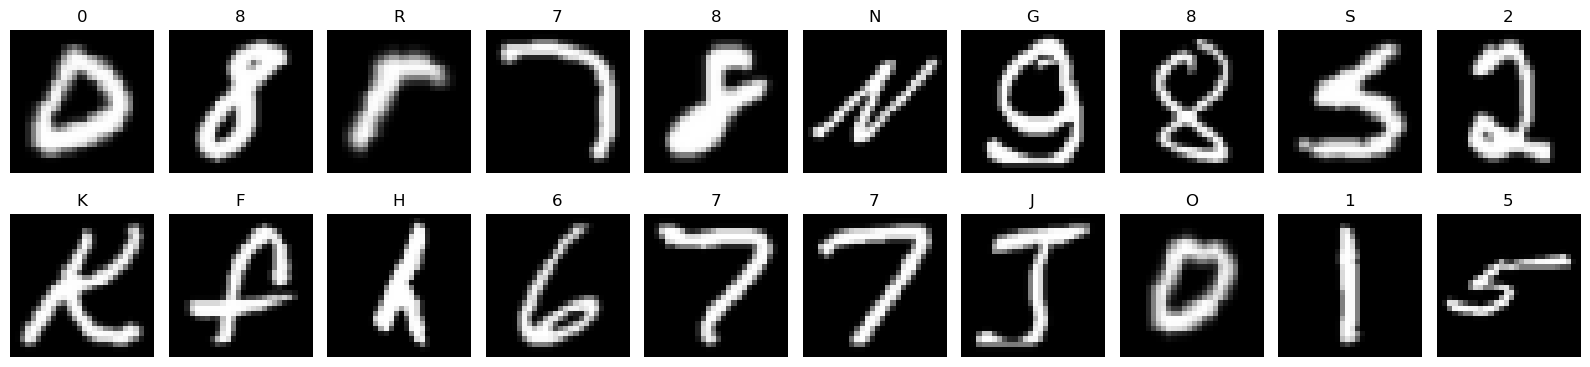

In [6]:
import string

# Mostra 20 imatges aleatòries del conjunt total
indices = np.random.choice(len(X_train_total), size=20, replace=False)

fig, axes = plt.subplots(2, 10, figsize=(16, 4))

for i, idx in enumerate(indices):
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    
    ax.imshow(X_train_total[idx].squeeze(), cmap="gray")
    
    label = y_train_total[idx]
    if label < 26:
        # Lletra (A–Z)
        title = string.ascii_uppercase[label]
    else:
        # Dígit (0–9)
        title = str(label - 26)
        
    ax.set_title(f"{title}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.neural_network import MLPClassifier

# Crear el model: 1 hidden layer amb 128 neurones
model = MLPClassifier(hidden_layer_sizes=(128,),
                    activation='relu',
                    solver='adam',
                    max_iter=20,
                    verbose=True,
                    random_state=42)

In [8]:
# Aplanem les imatges: de (28, 28, 1) → (784,)
X_train_flat = X_train_total.reshape(len(X_train_total), -1)
X_test_flat = X_test_total.reshape(len(X_test_total), -1)

model.fit(X_train_flat, y_train_total)

Iteration 1, loss = 0.73534586
Iteration 2, loss = 0.45053512
Iteration 3, loss = 0.39065923
Iteration 4, loss = 0.36046679
Iteration 5, loss = 0.34119932
Iteration 6, loss = 0.32822339
Iteration 7, loss = 0.31727817
Iteration 8, loss = 0.30965852
Iteration 9, loss = 0.30281127
Iteration 10, loss = 0.29647024
Iteration 11, loss = 0.29158537
Iteration 12, loss = 0.28695883
Iteration 13, loss = 0.28314624
Iteration 14, loss = 0.27924559
Iteration 15, loss = 0.27581872
Iteration 16, loss = 0.27340389
Iteration 17, loss = 0.27066704
Iteration 18, loss = 0.26834743
Iteration 19, loss = 0.26555730
Iteration 20, loss = 0.26342765


c:\Users\joana\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42,
              verbose=True)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Prediccions
y_pred = model.predict(X_test_flat)

# Precisió
print("Precisió del model:", accuracy_score(y_test_total, y_pred))

# Informe detallat
print(classification_report(y_test_total, y_pred))

Precisió del model: 0.8996546052631579
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       800
           1       0.86      0.77      0.81       800
           2       0.91      0.92      0.92       800
           3       0.83      0.86      0.84       800
           4       0.94      0.88      0.91       800
           5       0.95      0.89      0.91       800
           6       0.73      0.56      0.63       800
           7       0.87      0.90      0.89       800
           8       0.65      0.42      0.51       800
           9       0.86      0.89      0.87       800
          10       0.89      0.91      0.90       800
          11       0.84      0.24      0.37       800
          12       0.94      0.97      0.95       800
          13       0.90      0.87      0.89       800
          14       0.63      0.18      0.28       800
          15       0.95      0.93      0.94       800
          16       0.76      0.52      0.6

In [ ]:
from joblib import dump, load

# Guardar el model entrenat
dump(model, r"C:\Users\joana\Documents\Projectes personals\TR\projecte\model1_mlp.joblib")

# Carregar-lo més endavant
mlp_loaded = load( r"C:\Users\joana\Documents\Projectes personals\TR\projecte\model1_mlp.joblib")

# Provar que funciona
y_pred = mlp_loaded.predict(X_test_flat)
print("Accuracy després de carregar:", (y_pred == y_test_total).mean())

Accuracy després de carregar: 0.8996546052631579


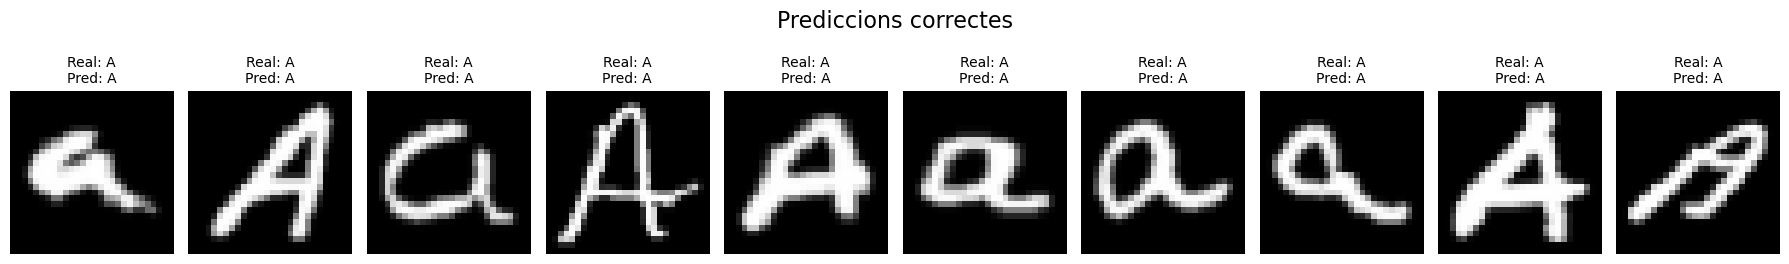

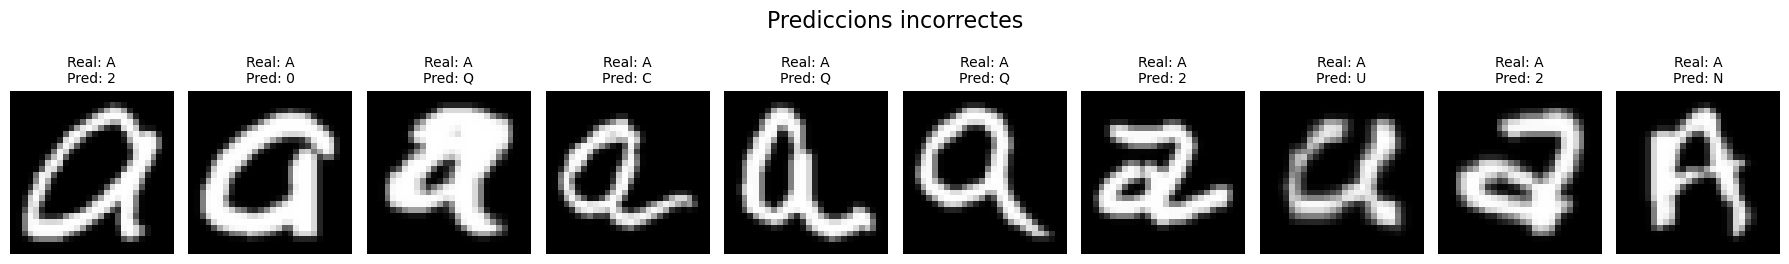

In [11]:
# Prediccions
y_pred = model.predict(X_test_flat)

# Trobar indexos correctes i incorrectes
correct = np.where(y_pred == y_test_total)[0]
incorrect = np.where(y_pred != y_test_total)[0]

# Funció per mostrar imatges
def mostrar_imatges(indexos, titol, n=10):
    fig, axes = plt.subplots(1, n, figsize=(18, 3))
    fig.suptitle(titol, fontsize=16)

    for i, idx in enumerate(indexos[:n]):
        ax = axes[i]
        img = X_test_total[idx].squeeze()
        real = y_test_total[idx]
        pred = y_pred[idx]

        if real < 26:
            real_txt = string.ascii_uppercase[real]
        else:
            real_txt = str(real - 26)

        if pred < 26:
            pred_txt = string.ascii_uppercase[pred]
        else:
            pred_txt = str(pred - 26)

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Real: {real_txt}\nPred: {pred_txt}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar 10 correctes
mostrar_imatges(correct, "Prediccions correctes", n=10)

# Mostrar 10 incorrectes
mostrar_imatges(incorrect, "Prediccions incorrectes", n=10)

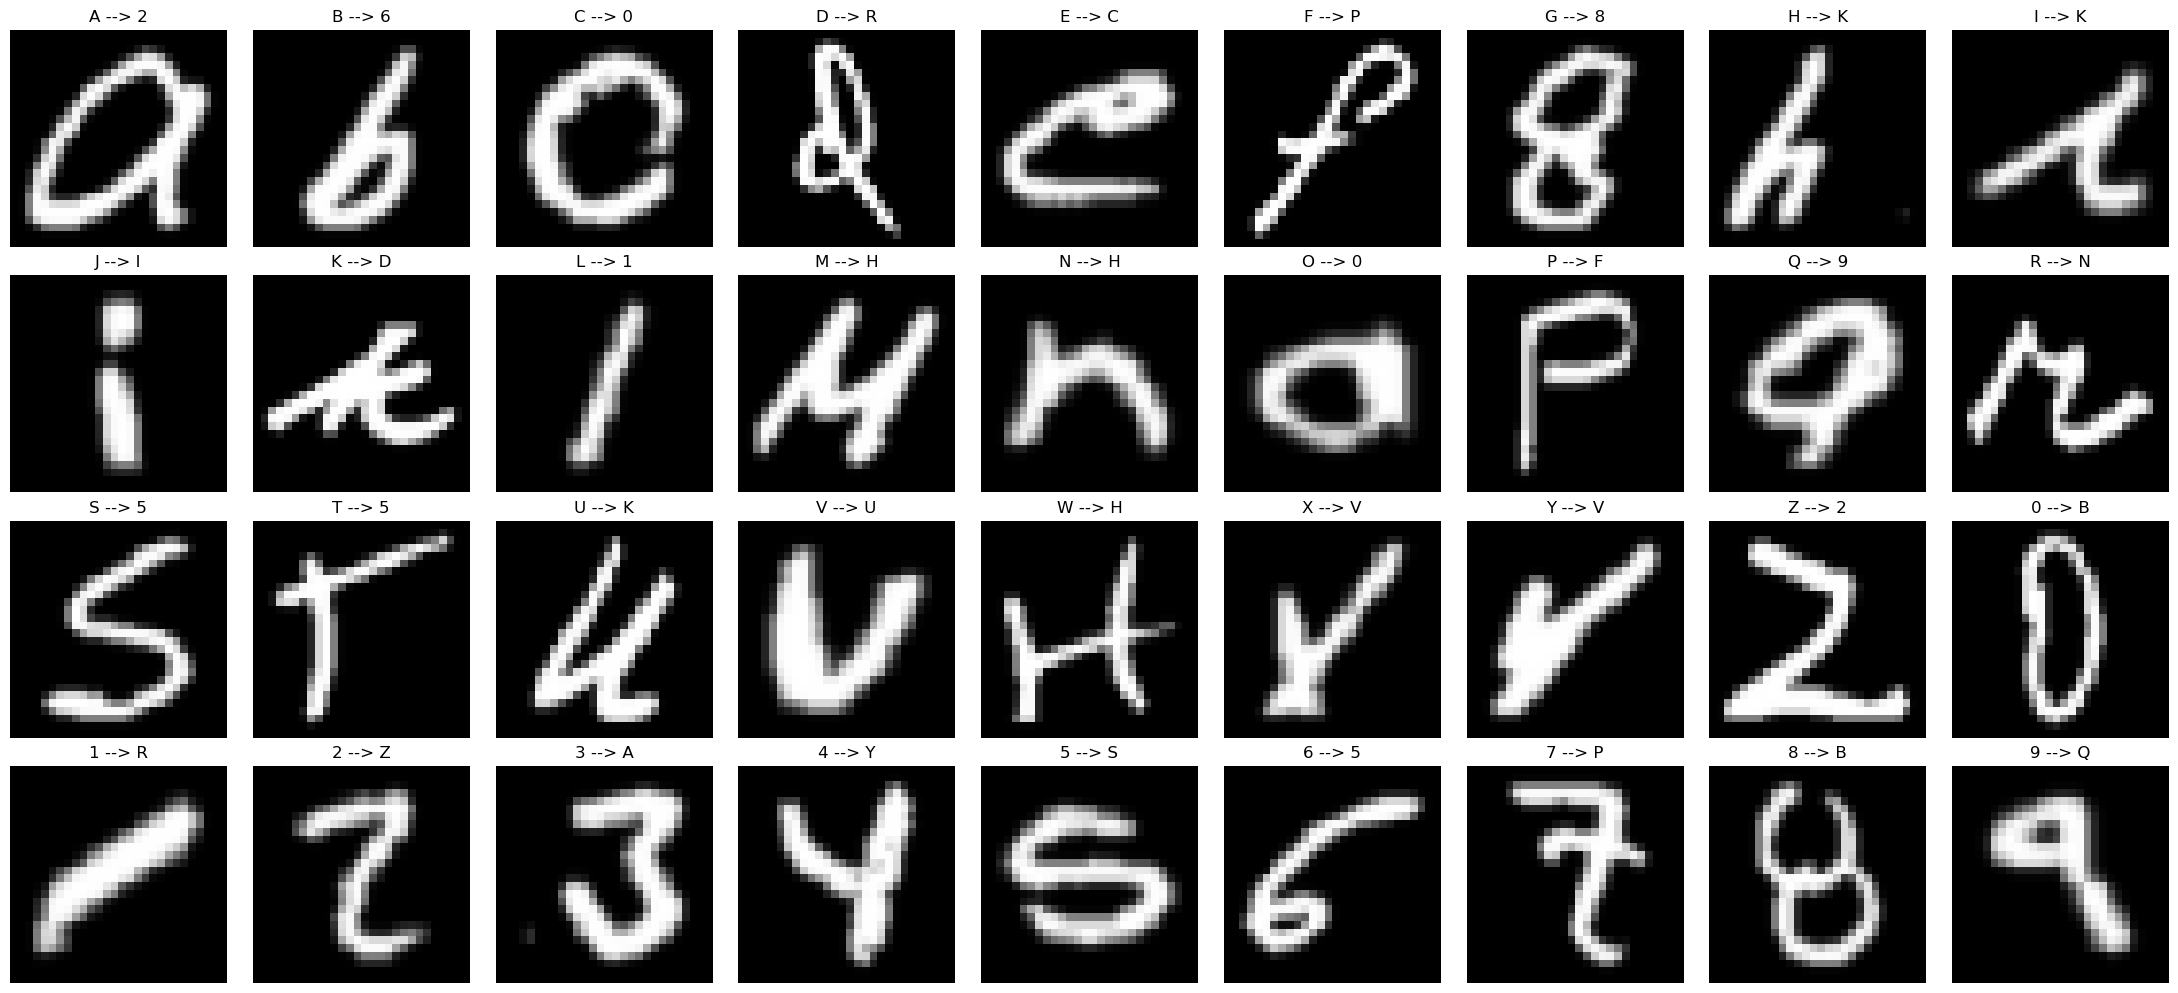

In [12]:
# Índexs on el model s'ha equivocat
incorrectes = np.where(y_pred != y_test_total)[0]

# Total de classes: 26 lletres + 10 dígits = 36
n_classes = 36
fig, axes = plt.subplots(4, 9, figsize=(22, 10))  # 4x9 = 36
axes = axes.flatten()

n_mostrat = 0  # Comptador

for label in range(n_classes):
    # Buscar el primer error per a aquesta classe
    idxs = [i for i in incorrectes if y_test_total[i] == label]
    
    if len(idxs) > 0:
        idx = idxs[0]
        ax = axes[n_mostrat]

        img = X_test_total[idx].squeeze()
        real = y_test_total[idx]
        pred = y_pred[idx]

        # Convertir etiqueta real
        if real < 26:
            real_txt = string.ascii_uppercase[real]
        else:
            real_txt = str(real - 26)

        # Convertir etiqueta predita
        if pred < 26:
            pred_txt = string.ascii_uppercase[pred]
        else:
            pred_txt = str(pred - 26)

        ax.imshow(img, cmap='gray')
        ax.set_title(f"{real_txt} --> {pred_txt}", fontsize=12)
        ax.axis('off')

        n_mostrat += 1

# Amagar subgràfics buits
for i in range(n_mostrat, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

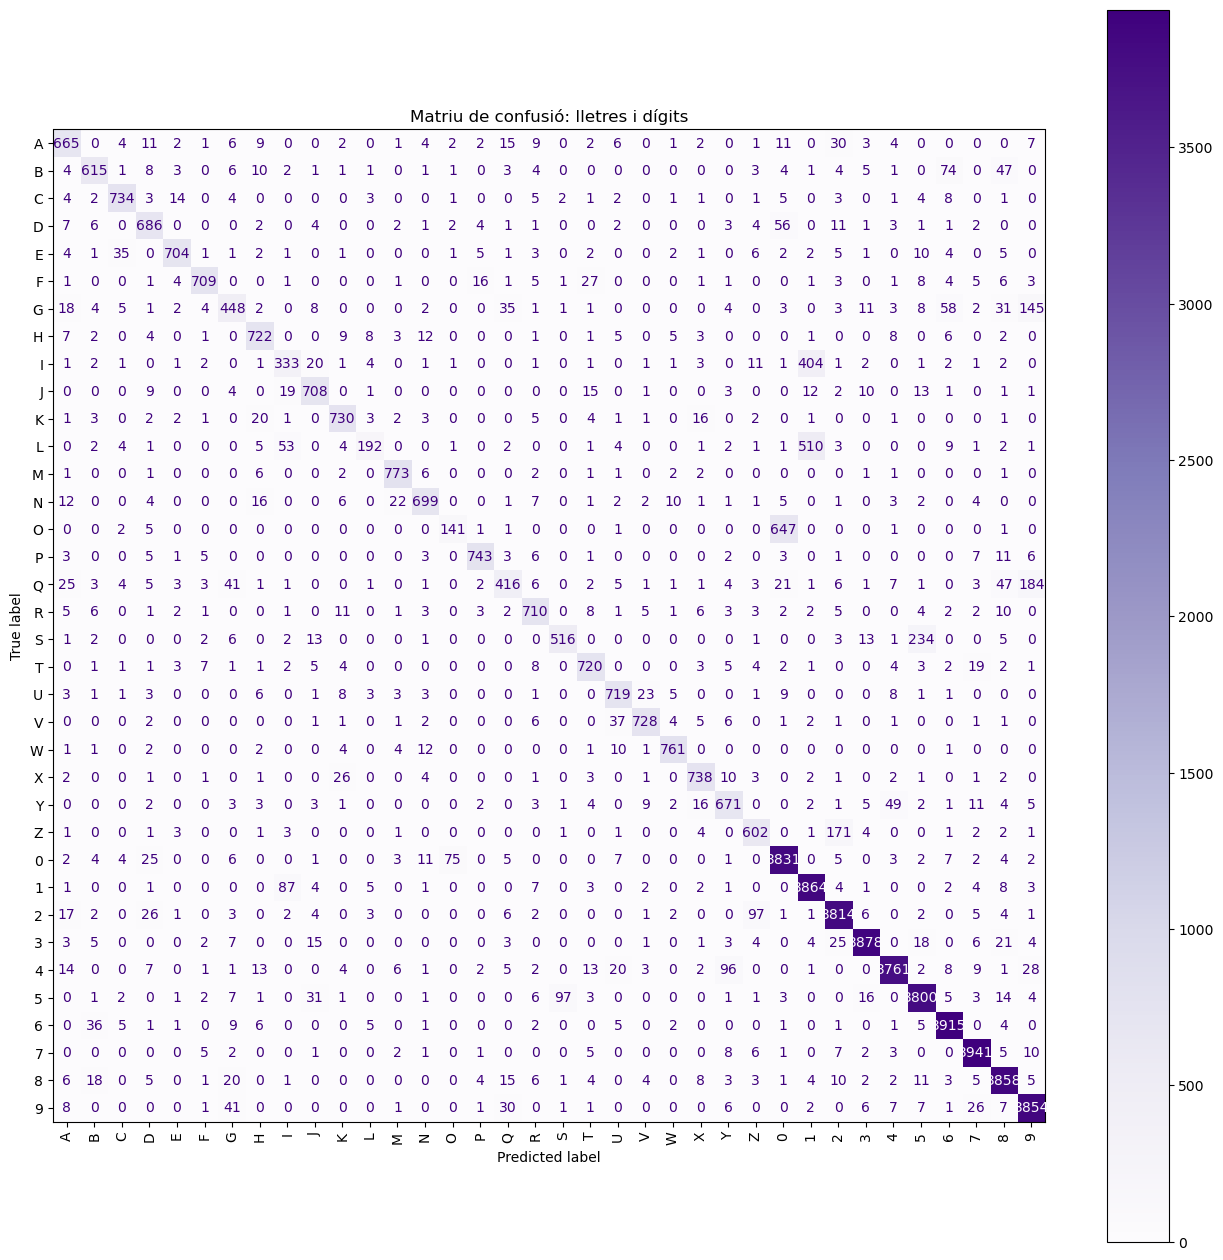

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriu de confusió
cm = confusion_matrix(y_test_total, y_pred)

# Etiquetes: A–Z + 0–9
labels = list(string.ascii_uppercase) + [str(i) for i in range(10)]

# Mostrar la matriu
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(16, 16))
disp.plot(ax=ax, cmap='Purples', xticks_rotation=90, colorbar=True)
plt.title("Matriu de confusió: lletres i dígits")
plt.show()

In [14]:
# Calculem per a cada classe:
# - el nombre total de mostres (suma de files)
# - el nombre d'encerts (diagonal)
# - el percentatge d'encerts
total_per_class = cm.sum(axis=1)
correct_per_class = np.diag(cm)
accuracy_per_class = correct_per_class / total_per_class

# Ordenem les classes de menys a més precises
worst_indices = np.argsort(accuracy_per_class)[:10]  # Les 10 pitjors

print("Classes més problemàtiques:")
for idx in worst_indices:
    label = labels[idx]
    acc = accuracy_per_class[idx] * 100
    print(f"- Classe '{label}': {acc:.2f}% d'encerts ({correct_per_class[idx]} de {total_per_class[idx]})")

Classes més problemàtiques:
- Classe 'O': 17.62% d'encerts (141 de 800)
- Classe 'L': 24.00% d'encerts (192 de 800)
- Classe 'I': 41.62% d'encerts (333 de 800)
- Classe 'Q': 52.00% d'encerts (416 de 800)
- Classe 'G': 56.00% d'encerts (448 de 800)
- Classe 'S': 64.50% d'encerts (516 de 800)
- Classe 'Z': 75.25% d'encerts (602 de 800)
- Classe 'B': 76.88% d'encerts (615 de 800)
- Classe 'A': 83.12% d'encerts (665 de 800)
- Classe 'Y': 83.88% d'encerts (671 de 800)


In [ ]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import cv2

# --- FUNCIONS DE PREDICCIÓ ---
def predict_digit(img):
    # Convertim a escala de grisos i invertim colors (fons negre, dígit blanc)
    img = img.convert("L")
    img = ImageOps.invert(img)  
    img = img.resize((28,28), Image.Resampling.LANCZOS)

    img = np.array(img) / 255.0
    img = img.reshape(1,784)  # MLP espera vectors de 784

    prediction = model.predict(img)  # mlp2 ha d'estar carregat abans
    return prediction[0]

# --- FUNCIONS DE TKINTER ---
def paint(event):
    x1, y1 = (event.x - 8), (event.y - 8)
    x2, y2 = (event.x + 8), (event.y + 8)
    canvas.create_oval(x1, y1, x2, y2, fill="white", width=0)
    draw.ellipse([x1, y1, x2, y2], fill="white")

def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, 200, 200], fill="black")
    label_result.config(text="Resultat: ")

def predict_canvas():
    digit = predict_digit(image1)
    label_result.config(text=f"Predicció: {digit}")

# --- TKINTER ---
root = tk.Tk()
root.title("Reconèixer dígits amb MLP")

canvas = tk.Canvas(root, width=200, height=200, bg="black")
canvas.pack()

image1 = Image.new("RGB", (200, 200), "black")
draw = ImageDraw.Draw(image1)

canvas.bind("<B1-Motion>", paint)

btn_predict = tk.Button(root, text="Predir", command=predict_canvas)
btn_predict.pack()

btn_clear = tk.Button(root, text="Netejar", command=clear_canvas)
btn_clear.pack()

label_result = tk.Label(root, text="Resultat: ")
label_result.pack()

root.mainloop()




